# Table of Contents

## Import Libraries and Data
## Explore and Format Happiness Data 
## Format Covid Data
## Merge Data Sets
## Visualizations
## Correlation Plot

# Import Libraries and Data

In [7]:
# import libraries
import pandas as pd
import numpy as np
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [8]:
# create path
path = r'C:\Users\18602\Documents\Data Analytics\Data Immersion\Month 6\A6 Project\02 Data'

In [9]:
# import whr
happy = pd.read_csv(os.path.join(path, 'Original Data', '2019.csv'))

In [10]:
# import covid data
covid = pd.read_html("https://en.wikipedia.org/wiki/COVID-19_pandemic_death_rates_by_country")

In [11]:
# check covid datasets
len(covid)

48

# Explore and Format Happiness Data

In [12]:
# check whr import
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
happy.shape

(156, 9)

In [14]:
happy.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [15]:
# rename columns
happy.rename(columns = {'Overall rank': 'Rank', 'Country or region': 'Country','GDP per capita': 'Economy', 'Social support':'Social Support', 'Healthy life expectancy': 'Life Expectancy', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Government Trust'}, inplace = True)

In [16]:
# check output
happy.head()

,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Government Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
# assign year
happy['Year'] = '2019'

In [18]:
# check output
happy.head()

,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Government Trust,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [20]:
# save to file
happy.to_csv(os.path.join(path, 'Prepared Data', 'happy_2019.csv'))

# Format Covid Data

In [59]:
# turn covid data into dataframe
df = covid[1]

In [60]:
# check output
df.head()

,Country,Deaths / million,Deaths,Cases
0,World[a],825,6527372,612314658
1,Peru,6415,216309,4132687
2,Bulgaria,5472,37682,1252615
3,Bosnia and Herzegovina,4924,16108,397822
4,Hungary,4882,47409,2070443


In [63]:
# create subset of needed columns
df2 = df[['Country', 'Deaths / million','Deaths']]

In [64]:
# check subset
df2.head()

,Country,Deaths / million,Deaths
0,World[a],825,6527372
1,Peru,6415,216309
2,Bulgaria,5472,37682
3,Bosnia and Herzegovina,4924,16108
4,Hungary,4882,47409


# Merge Data Sets

In [66]:
# merge data
df3 = happy.merge(df2, on =  'Country', how = 'left')

In [67]:
# check merge
df3.head()

,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Government Trust,Year,Deaths / million,Deaths
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,1058,5858
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,1196,7004
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,747,4038
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,575,213
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,1297,22713


# Visualizations

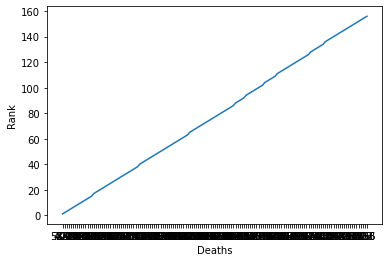

In [68]:
# line chart
line = sns.lineplot(data = df3, x = 'Deaths',y = 'Rank')

In [69]:
# save line chart
line.figure.savefig(os.path.join(path,'deaths_rank.png'))

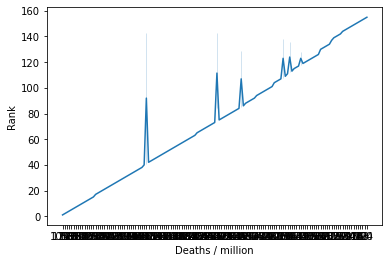

In [70]:
# line chart 2
line2 = sns.lineplot(data = df3, x = 'Deaths / million', y = 'Rank')

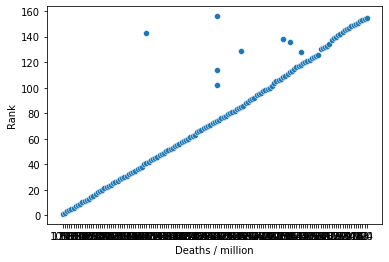

In [111]:
# create scatterplot
scatter = sns.scatterplot(x = 'Deaths / million', y = 'Rank',data = df3)

In [112]:
# save scatterplot
scatter.figure.savefig(os.path.join(path,'deaths_scatter'))

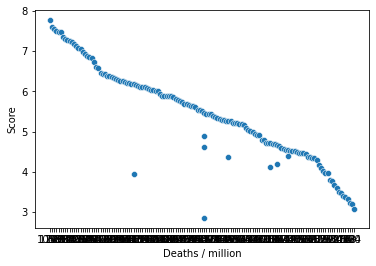

In [113]:
# second scatter plot
scatter2 = sns.scatterplot(x = 'Deaths / million', y = 'Score',data = df3)

# Correlation Plot

In [82]:
# create subset for our plot
df4 = df3[['Ran1k','Score','Deaths','Deaths / million']]

In [87]:
# check for nulls to convert dtypes
df4.isnull().sum()

Rank                0
Score               0
Deaths              9
Deaths / million    9
dtype: int64

In [90]:
# fill in nulls
df4.fillna(0, inplace = True)

C:\Users\18602\AppData\Local\Temp\ipykernel_10444\2628938681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.fillna(0, inplace = True)


In [91]:
# check output
df4.isnull().sum()

Rank                0
Score               0
Deaths              0
Deaths / million    0
dtype: int64

In [92]:
# check d types
df4.dtypes

Rank                  int64
Score               float64
Deaths               object
Deaths / million     object
dtype: object

In [99]:
# convert to string to convert to int
df4['Deaths'] = df4['Deaths'].astype(str)

C:\Users\18602\AppData\Local\Temp\ipykernel_10444\1133552032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Deaths'] = df4['Deaths'].astype(str)


In [100]:
df4['Deaths'] = df4['Deaths'].astype(int)

C:\Users\18602\AppData\Local\Temp\ipykernel_10444\1444489774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Deaths'] = df4['Deaths'].astype(int)


In [102]:
df4['Deaths / million'] = df4['Deaths / million'].astype(str)

C:\Users\18602\AppData\Local\Temp\ipykernel_10444\1995568616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Deaths / million'] = df4['Deaths / million'].astype(str)


In [103]:
df4['Deaths / million'] = df4['Deaths / million'].astype(int)

C:\Users\18602\AppData\Local\Temp\ipykernel_10444\3069000063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Deaths / million'] = df4['Deaths / million'].astype(int)


In [104]:
# create correlation matric
df4.corr()

,Rank,Score,Deaths,Deaths / million
Rank,1.000000,-0.989096,-0.196165,-0.376225
Score,-0.989096,1.000000,0.223362,0.355303
Deaths,-0.196165,0.223362,1.000000,-0.000083
Deaths / million,-0.376225,0.355303,-0.000083,1.000000


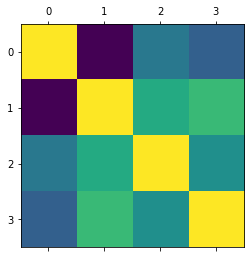

In [106]:
# Create a correlation heatmap using matplotlib

plt.matshow(df4.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

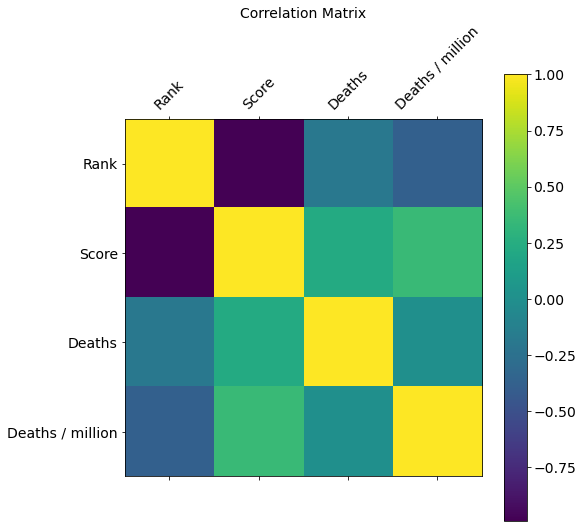

In [107]:
# create detailed correlation heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df4.corr(), fignum=f.number) # type of plot
plt.xticks(range(df4.shape[1]), df4.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df4.shape[1]), df4.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

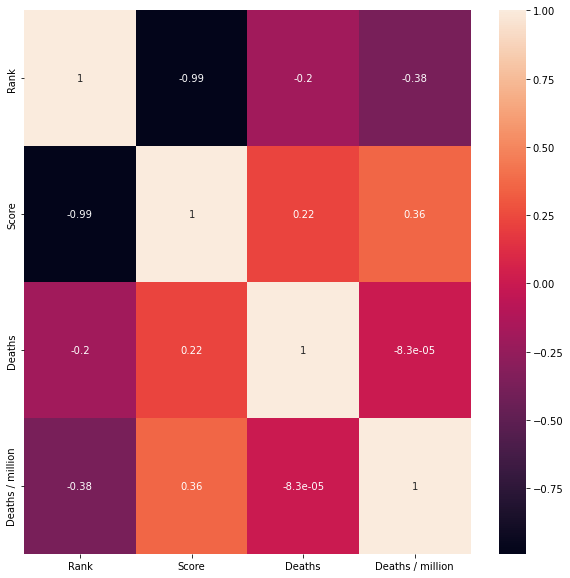

In [108]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df4.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There is a moderate relationship between Rank/Score and deaths per million.There is not a strong relationship deaths and score/rank.

In [ ]:
# export data
df3.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_wrangled.csv'))